<a href="https://colab.research.google.com/github/LEEINSEO-0118/Brand_Detective/blob/main/Similarity_Measure/Similarity_Measure_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import


In [6]:
import os
import fnmatch
import zipfile

import cv2

import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = '/content/drive/MyDrive/ai부트캠프/Final_Project/Data'

#SEED


In [7]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(2024) # Seed 고정

# Upscaling

In [8]:
# Define model
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel('/content/drive/MyDrive/ai부트캠프/Final_Project/Similarity_Measure/EDSR_x3.pb')
sr.setModel('edsr', 3)

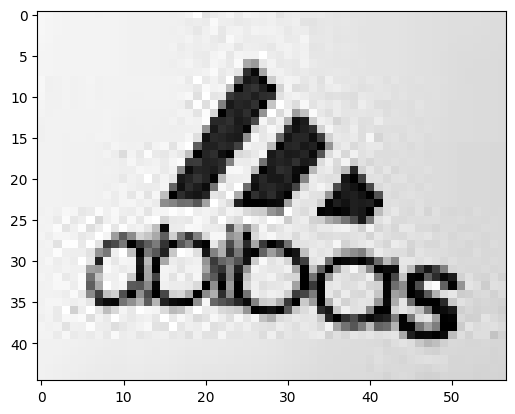

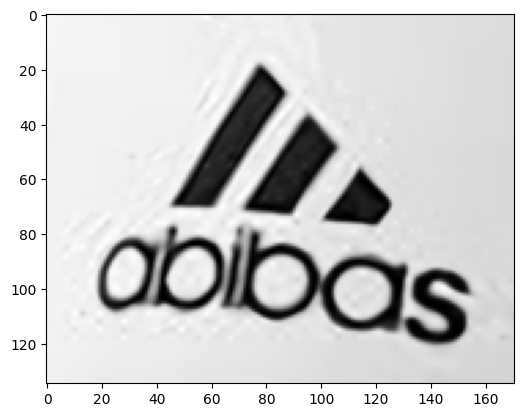

In [21]:
path = f'{data}/cropped/crop_image_1_1.jpg'

img = cv2.imread(path)
upscaled = sr.upsample(img)

plt.subplots(1)
plt.imshow(img)
plt.subplots(1)
plt.imshow(upscaled)
plt.show()

# View Images


adidas_sports_logo.png


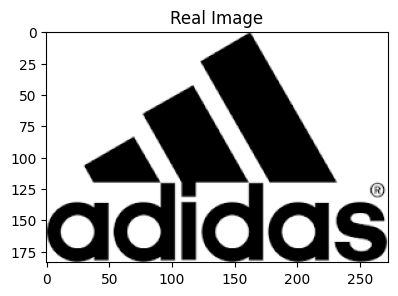

In [22]:
fig = plt.figure(figsize=(15, 15))
rows = 3
cols = 3
i = 1

for file_name in os.listdir(f'{data}/LOGO'):
    print(file_name)
    image = cv2.imread(f'{data}/LOGO/{file_name}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(image)
    i += 1
plt.title('Real Image')
plt.show()

crop_image_2_1.jpg
crop_image_1_1.jpg
crop_image_3_1.jpg
crop_image_4_1.jpg
crop_image_4_2.jpg


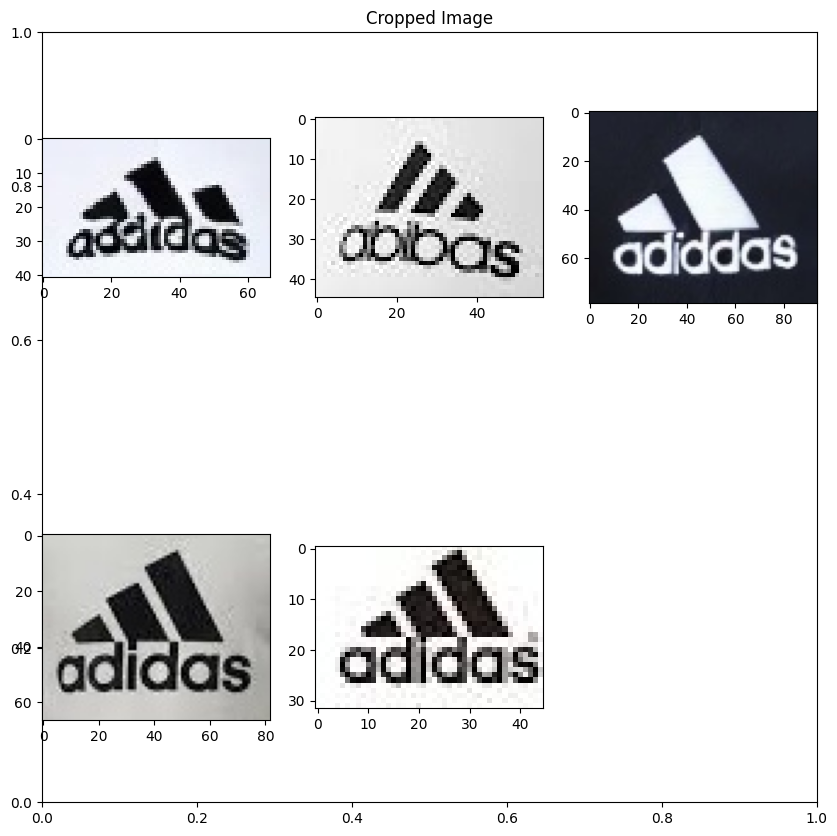

In [23]:
fig = plt.figure(figsize=(10, 10))
rows = 2
cols = 3
i = 1
plt.title('Cropped Image')

for file_name in os.listdir(f'{data}/cropped'):
    print(file_name)
    image = cv2.imread(f'{data}/cropped/{file_name}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(image)
    i += 1
plt.show()

### Delete Cropped Data

In [33]:
for file_path in os.listdir(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped'):
    os.remove(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped/{file_path}')

# Extraction matching

### ORB

In [44]:
img.shape[1]

163

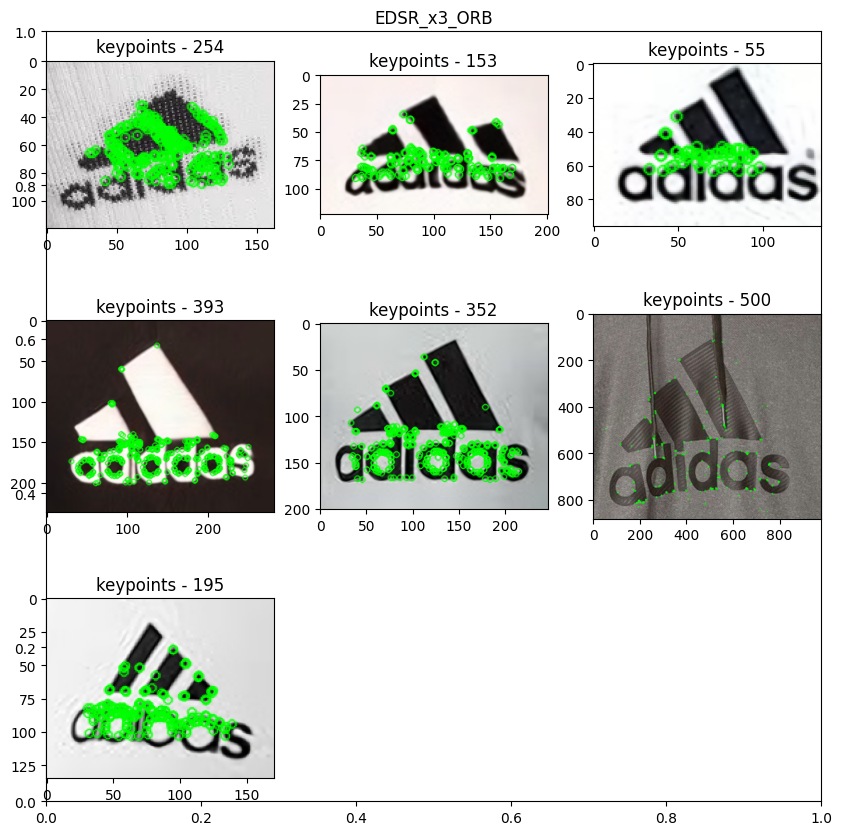

In [58]:
fig = plt.figure(figsize=(10, 10))
rows = 3
cols = 3
i = 1
plt.title('EDSR_x3_ORB')

for file_name in os.listdir(f'{data}/cropped'):
    path = f'{data}/cropped/{file_name}'
    img = cv2.imread(path)

    # upsampling
    if img.shape[0] < 100 or img.shape[1] < 100:
        img = sr.upsample(img)

    # Initiate ORB detector
    orb = cv2.ORB_create()

    # find the keypoints with ORB and compute the descriptors
    kp, des = orb.detectAndCompute(img,None)

    # draw only keypoints location,not size and orientation
    img = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img)
    plt.title(f'keypoints - {len(kp)}')
    i += 1
plt.show()

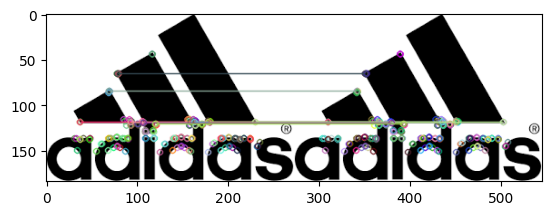

In [73]:
path1 = f'{data}/LOGO/adidas_sports_logo.png'
path2 = f'{data}/cropped/crop_image_5_1.jpg'
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
res = None

# upsampling cropped image
if img2.shape[0] < 100 or img2.shape[1] < 100:
    img2 = sr.upsample(img2)

# Initiate ORB detector
orb = cv2.ORB_create()

# compute the descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# Define Matcher
# ORB의 경우 2진 문자열 기반의 방식 -> HAMMING 사용되어져야 함
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# 가장 유사한 쌍 부터 n개의 쌍 연결
n = 10
res = cv2.drawMatches(img1,kp1,img2,kp2,matches[:n],res,flags=0)
plt.imshow(res)
plt.show()

In [74]:
dists = [match_.distance for match_ in matches]
print(dists[0:10])
print(f'Top 10 avg - {round(sum(dists[0:10])/10, 2)}')
print(f'Total avg - {round(sum(dists)/len(dists),2)}')

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Top 10 avg - 0.0
Total avg - 0.0


### AKAZE

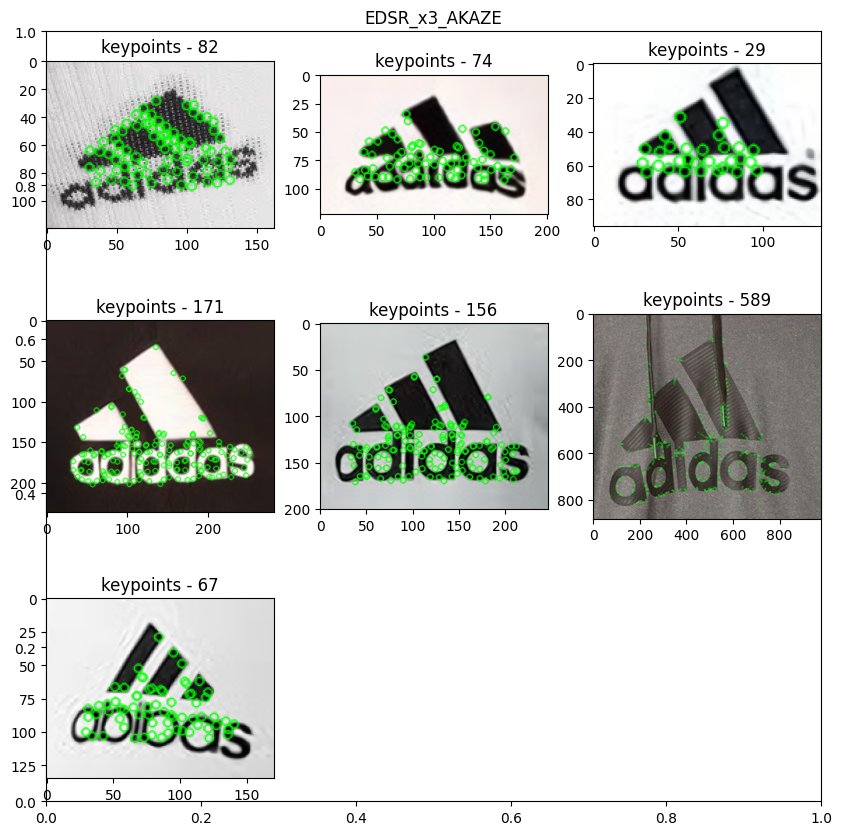

In [57]:
fig = plt.figure(figsize=(10, 10))
rows = 3
cols = 3
i = 1
plt.title('EDSR_x3_AKAZE')

for file_name in os.listdir(f'{data}/cropped'):
    path = f'{data}/cropped/{file_name}'
    img = cv2.imread(path)

    # upsampling
    if img.shape[0] < 100 or img.shape[1] < 100:
        img = sr.upsample(img)

    # Initiate ORB detector
    akaze = cv2.AKAZE_create()

    # compute the descriptors with ORB
    kp, des = akaze.detectAndCompute(img,None)

    # draw only keypoints location,not size and orientation
    img = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img)
    plt.title(f'keypoints - {len(kp)}')
    i += 1
plt.show()

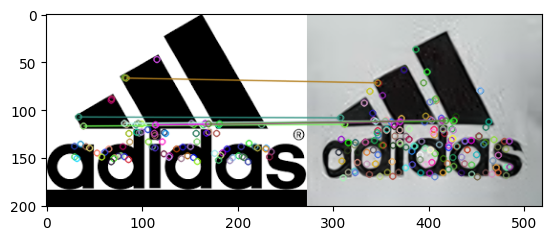

In [81]:
path1 = f'{data}/LOGO/adidas_sports_logo.png'
path2 = f'{data}/cropped/crop_image_4_1.jpg'
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
res = None

# upsampling cropped image
if img2.shape[0] < 100 or img2.shape[1] < 100:
    img2 = sr.upsample(img2)

# Initiate ORB detector
akaze = cv2.AKAZE_create()

# compute the descriptors with ORB
kp1, des1 = akaze.detectAndCompute(img1,None)
kp2, des2 = akaze.detectAndCompute(img2,None)

# Define Matcher
# ORB의 경우 2진 문자열 기반의 방식 -> HAMMING 사용되어져야 함
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# 가장 유사한 쌍 부터 n개의 쌍 연결
n = 10
res = cv2.drawMatches(img1,kp1,img2,kp2,matches[:n],res,flags=0)
plt.imshow(res)
plt.show()

In [82]:
dists = [match_.distance for match_ in matches]
print(dists[0:10])
print(f'Top 10 avg - {round(sum(dists[0:10])/10, 2)}')
print(f'Total avg - {round(sum(dists)/len(dists),2)}')

[33.0, 35.0, 35.0, 40.0, 47.0, 49.0, 50.0, 53.0, 56.0, 58.0]
Top 10 avg - 45.6
Total avg - 77.87


# Similarity Measure

### Compare Similarity